# T4

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
data = pd.read_csv("T4_features_final.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X = np.asarray(X)
y = np.asarray(y)

In [4]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.6363636363636364


In [6]:
# Create an SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.5454545454545454


In [7]:
gb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
gb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gb_accuracy)

Accuracy: 0.6363636363636364


In [8]:
# Create a logistic regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier = LogisticRegression(max_iter=1000)
# Train the classifier
logreg_classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
lr_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_accuracy)

Accuracy: 0.5454545454545454


In [9]:
from keras.models import Sequential, load_model
from keras.layers import Dense

In [10]:
norm = Normalizer(norm='max')
norm.fit(X_train)
X_train = norm.transform(X_train)

In [12]:
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1, l2

model1 = Sequential()
model1.add(Dense(512, activation='relu',kernel_regularizer=l1(0.01),input_dim=7))
model1.add(Dense(512, activation='relu',kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Create a ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model_T4.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Train the model with the callback
model1.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])

# Load the best model
model1 = load_model('best_model_T4.h5')

# Make predictions on the test set
y_pred = model1.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the accuracy of the model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", ann_accuracy)

Epoch 1/1000
1/2 [==============>...............] - ETA: 3s - loss: 7.7459 - accuracy: 0.6562
Epoch 1: val_accuracy improved from -inf to 0.54545, saving model to best_model_T4.h5
2/2 [==============================] - 4s 883ms/step - loss: 7.7096 - accuracy: 0.5476 - val_loss: 7.9182 - val_accuracy: 0.5455
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 7.3088 - accuracy: 0.5625
Epoch 2: val_accuracy improved from 0.54545 to 0.63636, saving model to best_model_T4.h5
2/2 [==============================] - 0s 292ms/step - loss: 7.2592 - accuracy: 0.5476 - val_loss: 7.0853 - val_accuracy: 0.6364
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 6.8939 - accuracy: 0.5938
Epoch 3: val_accuracy did not improve from 0.63636
2/2 [==============================] - 0s 135ms/step - loss: 6.8453 - accuracy: 0.6190 - val_loss: 6.8946 - val_accuracy: 0.6364
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 6.4951 - accuracy: 0.5938
Epoch 4: va

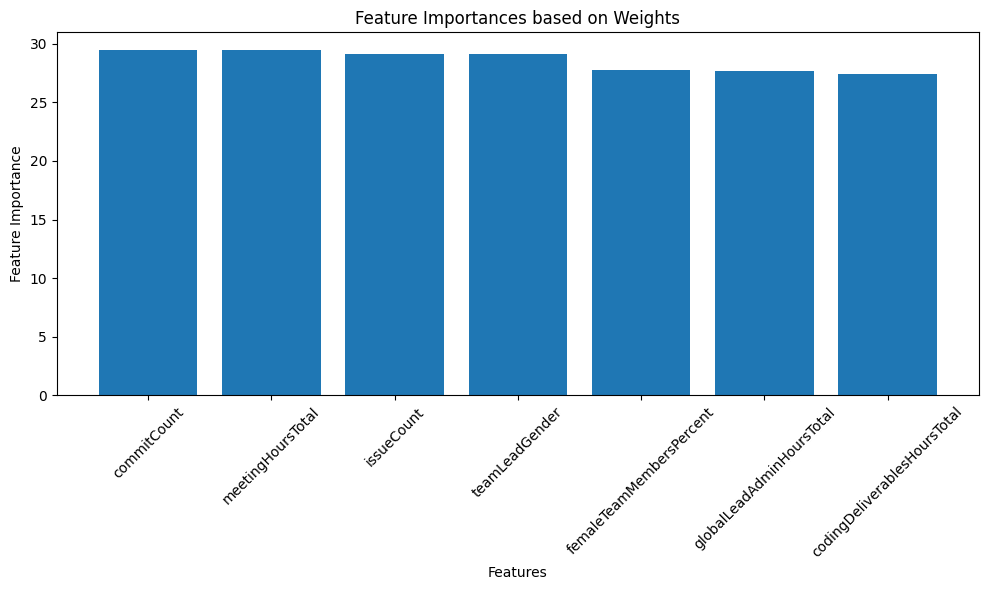

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Get the weights of the first layer
weights = model1.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights).sum(axis=1)

# Create a list of feature names
feature_names = ["femaleTeamMembersPercent", "meetingHoursTotal", "codingDeliverablesHoursTotal", "globalLeadAdminHoursTotal", "commitCount", "issueCount", "teamLeadGender","teamDistribution_encoded"]

# Sort the feature importances and feature names in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances based on Weights')
plt.tight_layout()
plt.show()


In [13]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already obtained the predictions for your test dataset using your model1
# Replace `y_test` with the true labels and `y_pred_probs` and `y_pred_classes` with your model's 

# Assuming you have obtained the predicted probabilities and class labels as follows
y_pred_probs = model1.predict(X_test, verbose=0)

# Convert probabilities to binary class predictions using a threshold (e.g., 0.5)
threshold = 0.5
y_pred_classes = (y_pred_probs > threshold).astype(int)


# Reduce the 2D prediction arrays to 1D arrays
#y_pred_probs = y_pred_probs[:, 0]
#y_pred_classes = y_pred_classes[:, 0]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print the results
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

Accuracy: 0.6363636363636364
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1 score: 0.6666666666666666


In [14]:
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC

# Make predictions on the test set
predicted_labels_rf = rf_classifier.predict(X_test)
predicted_labels_svm = svm_classifier.predict(X_test)
predicted_labels_lr = logreg_classifier.predict(X_test)
# Calculate precision for each model
precision_rf = precision_score(y_test, predicted_labels_rf)
precision_svm = precision_score(y_test, predicted_labels_svm)
precision_lr = precision_score(y_test, predicted_labels_lr)
# Calculate recall for each model
recall_rf = recall_score(y_test, predicted_labels_rf)
recall_svm = recall_score(y_test, predicted_labels_svm)
recall_lr = recall_score(y_test, predicted_labels_lr)
F1_rf = f1_score(y_test, predicted_labels_rf)
F1_svm = f1_score(y_test, predicted_labels_svm)
F1_lr = f1_score(y_test, predicted_labels_lr)
models = ['Random Forest', 'SVM', 'Logistic Regression']
precision_scores = [precision_rf,  precision_svm, precision_lr]
recall_scores = [recall_rf, recall_svm, recall_lr]
accuracy_score = [rf_accuracy, svm_accuracy, lr_accuracy]
f1_scores = [F1_rf, F1_svm, F1_lr]
# Print the performance scores
for i in range(len(models)):
    print(f"Performance scores for {models[i]}:")
    print("Precision:", precision_scores[i])
    print("Recall:", recall_scores[i])
    print("F1-score:", f1_scores[i])
    print("Accuracy", accuracy_score[i])
    print()

Performance scores for Random Forest:
Precision: 0.75
Recall: 0.5
F1-score: 0.6
Accuracy 0.6363636363636364

Performance scores for SVM:
Precision: 0.5714285714285714
Recall: 0.6666666666666666
F1-score: 0.6153846153846153
Accuracy 0.5454545454545454

Performance scores for Logistic Regression:
Precision: 0.6666666666666666
Recall: 0.3333333333333333
F1-score: 0.4444444444444444
Accuracy 0.5454545454545454



Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


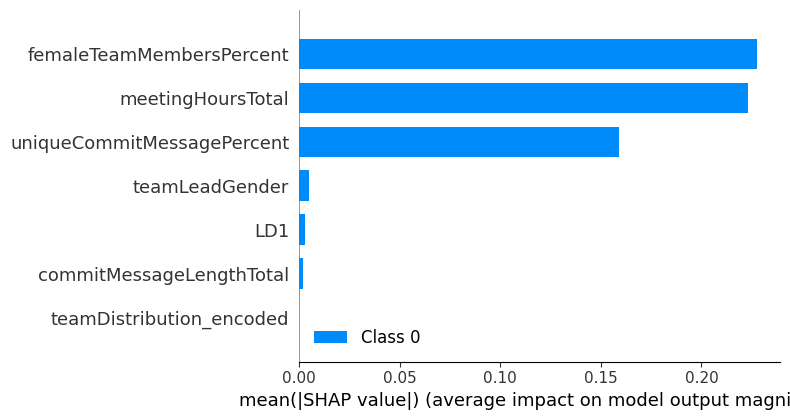

In [15]:
import numpy as np
import shap
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

feature_names = ["femaleTeamMembersPercent", "LD1", "uniqueCommitMessagePercent", "meetingHoursTotal", "commitMessageLengthTotal", "teamLeadGender","teamDistribution_encoded", "productLetterGrade_encoded"]

explainer = shap.DeepExplainer(model1, X_train)
shap_values = explainer.shap_values(X_test)



shap.summary_plot(shap_values, X_test, feature_names=feature_names)